#Airbnb-price-predict-20201009-LA
***
author: Joe Lin (林邑泉)

description: using 20201009-LA data from <a href="http://insideairbnb.com/">http://insideairbnb.com/</a> predict hotel price in Los Angeles 


##Google Colab Preparation 

In [123]:
from google.colab import drive
drive.mount('/content/drive')
data_folder = '/content/drive/My Drive/Colab Notebooks/20201009LA/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Preprocessing

Default setting

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time
import warnings

warnings.filterwarnings('ignore')

###Read data and data analysize

In [125]:
#read csv data as dataframe in pandas
listings_df = pd.read_csv(data_folder+'listings.csv', encoding='utf-8')

#print number of listing.
print(f"The dataset contains {len(listings_df)} Airbnb listings")
pd.set_option('display.max_columns', len(listings_df.columns))
pd.set_option('display.max_rows', 100)

#print listing feature, type and how many non-null data 
print(listings_df.info())
print(listings_df.describe())
#print the data from 0 to 2
listings_df.head(3)

The dataset contains 30533 Airbnb listings
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30533 entries, 0 to 30532
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            30533 non-null  int64  
 1   listing_url                                   30533 non-null  object 
 2   scrape_id                                     30533 non-null  int64  
 3   last_scraped                                  30533 non-null  object 
 4   name                                          30531 non-null  object 
 5   description                                   29526 non-null  object 
 6   neighborhood_overview                         19960 non-null  object 
 7   picture_url                                   30533 non-null  object 
 8   host_id                                       30533 non-null  int64  
 9   host_url          

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,109,https://www.airbnb.com/rooms/109,20201009145904,2020-10-25,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...",NaN,https://a0.muscache.com/pictures/4321499/1da98...,521,https://www.airbnb.com/users/show/521,Paolo,2008-06-27,"San Francisco, California, United States","Paolo Privitera, CEO Evensi\n\nPaolo, MIT MBA ...",NaN,NaN,0%,f,https://a0.muscache.com/im/pictures/user/e704a...,https://a0.muscache.com/im/pictures/user/e704a...,Culver City,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,NaN,Culver City,Other Cities,33.98209,-118.38494,Entire condominium,Entire home/apt,6,NaN,2 baths,2.0,3.0,"[""TV"", ""Heating"", ""Cable TV"", ""Kitchen"", ""Sham...",$115.00,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,0,0,0,207,2020-10-25,2,0,0,2011-08-15,2016-05-15,80.0,10.0,10.0,6.0,8.0,10.0,8.0,NaN,f,1,1,0,0,0.02
1,2708,https://www.airbnb.com/rooms/2708,20201009145904,2020-10-10,Beautiful Furnish Mirrored Mini-Suite w/ Firep...,Beautiful Furnished Mirror Mini-Suite w/ Firep...,We are minutes away from the Mentor Language I...,https://a0.muscache.com/pictures/miso/Hosting-...,3008,https://www.airbnb.com/users/show/3008,Chas.,2008-09-16,"Los Angeles, California, United States",Writer.\r\nLiterary Manager.\r\nPhotographer.\...,within a few hours,100%,100%,t,https://a0.muscache.com/im/pictures/user/d17cf...,https://a0.muscache.com/im/pictures/user/d17cf...,Hollywood,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"Los Angeles, California, United States",Hollywood,City of Los Angeles,34.09768,-118.34602,Private room in apartment,Private room,1,NaN,1.5 baths,1.0,1.0,"[""Bed linens"", ""Essentials"", ""Patio or balcony...",$75.00,30,366,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,0,30,60,335,2020-10-10,27,5,1,2014-06-09,2020-10-06,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,t,2,0,2,0,0.35
2,2732,https://www.airbnb.com/rooms/2732,20201009145904,2020-10-18,Zen Life at the Beach,An oasis of tranquility awaits you.<br /><br /...,"This is the best part of Santa Monica. Quiet, ...",https://a0.muscache.com/pictures/1082974/0f74c...,3041,https://www.airbnb.com/users/show/3041,Yoga Priestess,2008-09-17,"Santa Monica, California, United States",I have been teaching yoga and meditation for 3...,within an hour,92%,50%,f,https://a0.muscache.com/im/users/3041/profile_...,https://a0.muscache.com/im/users/3041/profile_...,Santa Monica,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Santa Monica, California, United States",Santa Monica,Other Cities,34.00475,-118.48127,Private room in apartment,Private room,1,NaN,1 private bath,1.0,1.0,"[""Hangers"", ""Refrigerator"", ""Dish

###Drop column - nan and useless column

In [126]:
drop_column = {}

#there is no data in nan_col
drop_column['nan_col'] = ['bathrooms', 'calendar_updated']

#url is not useful to analysize
drop_column['url_col'] = ['listing_url','picture_url','host_url','host_thumbnail_url', 'host_picture_url']

#useless data 
drop_column['useless_col'] = ['scrape_id', 'last_scraped', 'host_name', 'host_location', 'host_about',
                'host_neighbourhood', 'host_verifications','license','minimum_minimum_nights',
                'maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights',
                'minimum_nights_avg_ntm','maximum_nights_avg_ntm','calendar_last_scraped','id',
                'host_id']

#data that I don't wanna use, bathrooms_text is too complex
drop_column['no_use_col'] = ['availability_60','availability_90','availability_365','number_of_reviews_ltm',
                'neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed',
                'name','neighborhood_overview','description','host_listings_count',
                'calculated_host_listings_count','calculated_host_listings_count_entire_homes',
                'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms',
                'first_review','last_review','instant_bookable','bathrooms_text']

drop_column_list = []
#concat drop list
for index in drop_column:
  drop_column_list += drop_column[index]

#drop columns
listings_df2 = listings_df.drop(drop_column_list, axis=1)
listings_df2.replace({'f': 0, 't': 1}, inplace=True)

#release memory
del drop_column,drop_column_list
#del listings_df

listings_df2.tail(4)

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
30529,2017-06-03,within an hour,100%,99%,0.0,30.0,1.0,1.0,34.10220,-118.34663,Shared room in apartment,Shared room,1,1.0,1.0,"[""TV"", ""Extra pillows and blankets"", ""Heating""...",$34.00,1,1125,1,30,1,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0
30530,2016-07-05,within an hour,100%,100%,1.0,1.0,1.0,1.0,34.05945,-118.44134,Entire apartment,Entire home/apt,5,2.0,0.0,"[""TV"", ""Heating"", ""Kitchen"", ""Shampoo"", ""Fire ...",$200.00,7,1125,1,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30531,2016-12-16,within an hour,100%,100%,0.0,4.0,1.0,1.0,34.05036,-118.26509,Entire apartment,Entire home/apt,7,2.0,4.0,"[""Cleaning before checkout"", ""Pocket wifi"", ""E...",$241.00,30,1125,1,24,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30532,2017-04-27,within an hour,100%,97%,0.0,1.0,1.0,1.0,33.89514,-118.12646,Entire house,Entire home/apt,9,2.0,5.0,"[""TV"", ""Wifi"", ""Single level home"", ""First aid...",$165.00,2,21,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


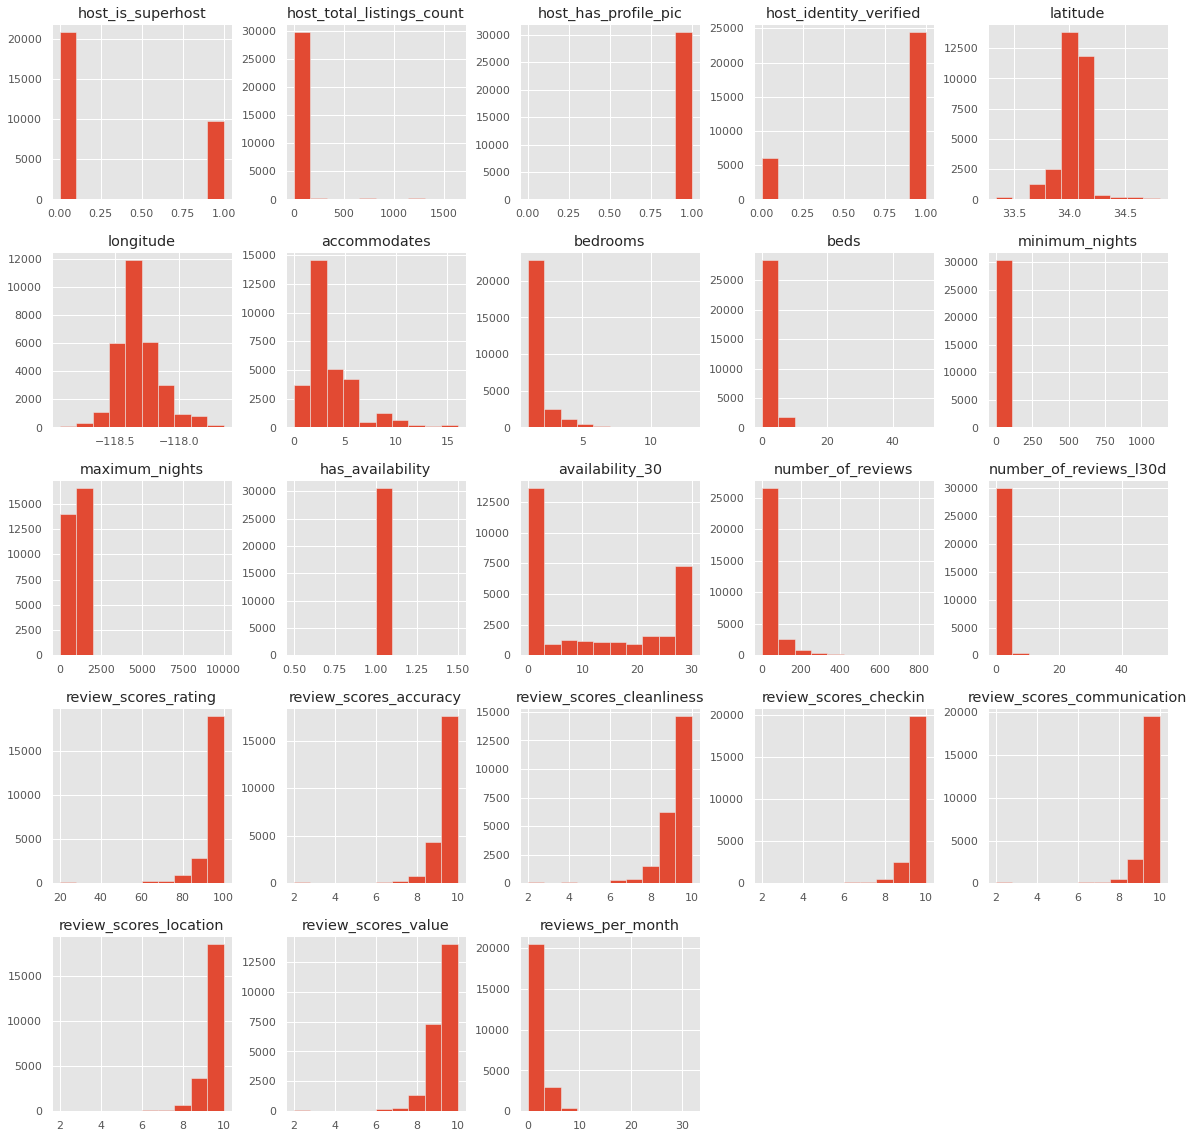

In [127]:
listings_df2.hist(figsize=(20,20));

In [128]:
#drop column that only has one category
listings_df2.drop(['host_has_profile_pic','has_availability'], axis=1 , inplace=True)


listings_df2.tail(4)

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_30,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
30529,2017-06-03,within an hour,100%,99%,0.0,30.0,1.0,34.10220,-118.34663,Shared room in apartment,Shared room,1,1.0,1.0,"[""TV"", ""Extra pillows and blankets"", ""Heating""...",$34.00,1,1125,30,1,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0
30530,2016-07-05,within an hour,100%,100%,1.0,1.0,1.0,34.05945,-118.44134,Entire apartment,Entire home/apt,5,2.0,0.0,"[""TV"", ""Heating"", ""Kitchen"", ""Shampoo"", ""Fire ...",$200.00,7,1125,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30531,2016-12-16,within an hour,100%,100%,0.0,4.0,1.0,34.05036,-118.26509,Entire apartment,Entire home/apt,7,2.0,4.0,"[""Cleaning before checkout"", ""Pocket wifi"", ""E...",$241.00,30,1125,24,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30532,2017-04-27,within an hour,100%,97%,0.0,1.0,1.0,33.89514,-118.12646,Entire house,Entire home/apt,9,2.0,5.0,"[""TV"", ""Wifi"", ""Single level home"", ""First aid...",$165.00,2,21,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data type transform and fill NA

In [129]:
listings_df2.head(3)

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_30,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,2008-06-27,NaN,NaN,0%,0.0,1.0,1.0,33.98209,-118.38494,Entire condominium,Entire home/apt,6,2.0,3.0,"[""TV"", ""Heating"", ""Cable TV"", ""Kitchen"", ""Sham...",$115.00,30,730,0,2,0,80.0,10.0,10.0,6.0,8.0,10.0,8.0,0.02
1,2008-09-16,within a few hours,100%,100%,1.0,2.0,1.0,34.09768,-118.34602,Private room in apartment,Private room,1,1.0,1.0,"[""Bed linens"", ""Essentials"", ""Patio or balcony...",$75.00,30,366,0,27,1,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0.35
2,2008-09-17,within an hour,92%,50%,0.0,2.0,1.0,34.00475,-118.48127,Private room in apartment,Private room,1,1.0,1.0,"[""Hangers"", ""Refrigerator"", ""Dishes and silver...",$155.00,1,180,30,21,0,94.0,9.0,9.0,9.0,9.0,10.0,9.0,0.18


In [130]:
listings_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30533 entries, 0 to 30532
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_since                   30523 non-null  object 
 1   host_response_time           22463 non-null  object 
 2   host_response_rate           22463 non-null  object 
 3   host_acceptance_rate         24344 non-null  object 
 4   host_is_superhost            30523 non-null  float64
 5   host_total_listings_count    30523 non-null  float64
 6   host_identity_verified       30523 non-null  float64
 7   latitude                     30533 non-null  float64
 8   longitude                    30533 non-null  float64
 9   property_type                30533 non-null  object 
 10  room_type                    30533 non-null  object 
 11  accommodates                 30533 non-null  int64  
 12  bedrooms                     26974 non-null  float64
 13  beds            

In [131]:
listings_df2.room_type.value_counts(normalize=True)

Entire home/apt    0.643075
Private room       0.319327
Shared room        0.032522
Hotel room         0.005076
Name: room_type, dtype: float64

In [132]:

# date string convert to datetime
listings_df2['host_since'] = pd.to_datetime(listings_df2['host_since']) 

# days since the host active
listings_df2['host_active_days'] = (datetime(2020, 10, 9) - listings_df2['host_since']).astype('timedelta64[D]')


# fill na with  median value
listings_df2['host_active_days'].fillna(listings_df2['host_active_days'].median(), inplace=True)

listings_df2.drop('host_since', axis=1, inplace=True)

In [133]:
#percentage to float
def p2f(x):
  try:
    return float(x.strip('%'))/100
  except:
    return x

#convert percentage string to float
percentage_list = ['host_response_rate','host_acceptance_rate']
for index in percentage_list:
  listings_df2[index] = listings_df2[index].apply(p2f)


#fill NA with median
number_median_list = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
            'review_scores_communication','review_scores_location','review_scores_value']
for index in number_median_list:
  listings_df2[index].fillna(listings_df2[index].median(), inplace=True)
for index in percentage_list:
  listings_df2[index].fillna(listings_df2[index].median(), inplace=True)

#fill NA with 1 because it has at least one
number_one_list = ['bedrooms','beds']
for index in number_one_list:
  listings_df2[index].fillna(listings_df2[index].median(), inplace=True)

#fill NA with 0 because it is unknown
number_zerom_list = ['reviews_per_month','host_is_superhost','host_total_listings_count','host_identity_verified']
for index in number_zerom_list:
  listings_df2[index].fillna(0, inplace=True)


#fill NA with unknown because it is unknown
index = 'host_response_time'
listings_df2[index].fillna('unknown', inplace=True)

#drop na that I don't know
listings_df2.dropna()

del percentage_list,number_median_list,number_one_list,index

In [134]:
import json
amenities_list = list(listings_df2['amenities'])
temp_amenities_list = []
amenities_set = set()
for amenities in amenities_list:
  temp_amenities_list += json.loads(amenities)
  
amenities_set = set(temp_amenities_list)

#print(len(amenities_set),amenities_set)
amenities_set
del temp_amenities_list,amenities_list,amenities_set

In [135]:
amenities_category = {'tv':'tv',
            'kitchen':'stove|oven|refrigerator|grill|microwave|freezer',
            'bathroom supplies':'conditioner|body soap|shampoo',
            'air con':'air conditioning|heating|ac unit',
            'entertainment':'hockey table|sound system',
            'safety':'alarm',
            'luxury':'alexa|alfresco|balcony|bar|basketball court|beach|lake|pool',
            'kids':'baby|children',
            'food':'breakfast|coffee',
            'gym':'fitness|gym',
            'transport':'bicycle|airport|parking|garage',
            'internet':'ethernet|internet|wifi'}
for category in amenities_category:
  listings_df2.loc[listings_df2['amenities'].str.lower().str.contains(amenities_category[category]), category] = int(1)
  listings_df2[category].fillna(0, inplace=True)

  
listings_df2.drop('amenities', axis=1, inplace=True)
del amenities_category

In [136]:
listings_df2.head(4)

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,host_active_days,tv,kitchen,bathroom supplies,air con,entertainment,safety,luxury,kids,food,gym,transport,internet
0,unknown,1.00,0.00,0.0,1.0,1.0,33.98209,-118.38494,Entire condominium,Entire home/apt,6,2.0,3.0,$115.00,30,730,0,2,0,80.0,10.0,10.0,6.0,8.0,10.0,8.0,0.02,4487.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
1,within a few hours,1.00,1.00,1.0,2.0,1.0,34.09768,-118.34602,Private room in apartment,Private room,1,1.0,1.0,$75.00,30,366,0,27,1,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0.35,4406.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
2,within an hour,0.92,0.50,0.0,2.0,1.0,34.00475,-118.48127,Private room in apartment,Private room,1,1.0,1.0,$155.00,1,180,30,21,0,94.0,9.0,9.0,9.0,9.0,10.0,9.0,0.18,4405.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,unknown,1.00,0.96,0.0,1.0,1.0,33.87619,-118.11397,Entire apartment,Entire home/apt,2,1.0,1.0,$50.00,30,730,0,0,0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0.00,4397.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [137]:
#price to float
def price2f(x):
  try:
    x = x.replace(',','')
    return float(x.strip('$'))
  except:
    try:
      return float(x.strip('$'))
    except:
      return x

listings_df2 = listings_df2.dropna(subset=['price'])
listings_df2['price'] = listings_df2['price'].apply(price2f)

In [138]:
listings_df2.head(4)

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,host_active_days,tv,kitchen,bathroom supplies,air con,entertainment,safety,luxury,kids,food,gym,transport,internet
0,unknown,1.00,0.00,0.0,1.0,1.0,33.98209,-118.38494,Entire condominium,Entire home/apt,6,2.0,3.0,115.0,30,730,0,2,0,80.0,10.0,10.0,6.0,8.0,10.0,8.0,0.02,4487.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
1,within a few hours,1.00,1.00,1.0,2.0,1.0,34.09768,-118.34602,Private room in apartment,Private room,1,1.0,1.0,75.0,30,366,0,27,1,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0.35,4406.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
2,within an hour,0.92,0.50,0.0,2.0,1.0,34.00475,-118.48127,Private room in apartment,Private room,1,1.0,1.0,155.0,1,180,30,21,0,94.0,9.0,9.0,9.0,9.0,10.0,9.0,0.18,4405.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,unknown,1.00,0.96,0.0,1.0,1.0,33.87619,-118.11397,Entire apartment,Entire home/apt,2,1.0,1.0,50.0,30,730,0,0,0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0.00,4397.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [139]:
listings_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30533 entries, 0 to 30532
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_time           30533 non-null  object 
 1   host_response_rate           30533 non-null  float64
 2   host_acceptance_rate         30533 non-null  float64
 3   host_is_superhost            30533 non-null  float64
 4   host_total_listings_count    30533 non-null  float64
 5   host_identity_verified       30533 non-null  float64
 6   latitude                     30533 non-null  float64
 7   longitude                    30533 non-null  float64
 8   property_type                30533 non-null  object 
 9   room_type                    30533 non-null  object 
 10  accommodates                 30533 non-null  int64  
 11  bedrooms                     30533 non-null  float64
 12  beds                         30533 non-null  float64
 13  price           

In [140]:
#save memory
int_columns = ['host_is_superhost','host_total_listings_count','host_identity_verified',
        'tv','kitchen','bathroom supplies','air con','entertainment','safty','luxury','kids',
        'food','gym','transport','internet']
for category in int_columns:
  try:
    listings_df2[category] = listings_df2[category].astype('int')
  except:
    print(category)
listings_df2['price'] = listings_df2['price'].astype('float')

safty


In [141]:
listings_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30533 entries, 0 to 30532
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_time           30533 non-null  object 
 1   host_response_rate           30533 non-null  float64
 2   host_acceptance_rate         30533 non-null  float64
 3   host_is_superhost            30533 non-null  int64  
 4   host_total_listings_count    30533 non-null  int64  
 5   host_identity_verified       30533 non-null  int64  
 6   latitude                     30533 non-null  float64
 7   longitude                    30533 non-null  float64
 8   property_type                30533 non-null  object 
 9   room_type                    30533 non-null  object 
 10  accommodates                 30533 non-null  int64  
 11  bedrooms                     30533 non-null  float64
 12  beds                         30533 non-null  float64
 13  price           

##Data preparing

###One hot

In [142]:
#one hot  data
transformed_df = pd.get_dummies(listings_df2)

In [143]:
transformed_df.describe()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,host_active_days,tv,kitchen,bathroom supplies,air con,entertainment,safety,luxury,kids,food,gym,transport,internet,...,property_type_Room in serviced apartment,property_type_Shared room,property_type_Shared room in aparthotel,property_type_Shared room in apartment,property_type_Shared room in bed and breakfast,property_type_Shared room in boat,property_type_Shared room in boutique hotel,property_type_Shared room in bungalow,property_type_Shared room in cabin,property_type_Shared room in camper/rv,property_type_Shared room in condominium,property_type_Shared room in cottage,property_type_Shared room in dome house,property_type_Shared room in dorm,property_type_Shared room in earth house,property_type_Shared room in farm stay,property_type_Shared room in guest suite,property_type_Shared room in guesthouse,property_type_Shared room in hostel,property_type_Shared room in house,property_type_Shared room in igloo,property_type_Shared room in loft,property_type_Shared room in serviced apartment,property_type_Shared room in tent,property_type_Shared room in tiny house,property_type_Shared room in townhouse,property_type_Shared room in villa,property_type_Tent,property_type_Tiny house,property_type_Tipi,property_type_Train,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
count,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,...,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000
mean,0.940076,0.867578,0.319097,29.284872,0.799332,34.045726,-118.316447,3.519143,1.541185,1.910883,218.908765,18.394458,669.162316,11.886811,35.220679,0.550421,95.117578,9.711460,9.567812,9.820391,9.797924,9.780631,9.568336,1.147737,1711.478368,0.825992,0.601939,0.769823,0.931025,0.009465,0.932336,0.495660,0.070645,0.577605,0.138604,0.852094,0.974781,...,0.000229,0.000131,0.000197,0.009793,0.000262,0.000033,0.000197,0.000426,0.000033,0.000066,0.000753,0.000066,0.000066,0.000197,0.000098,0.000066,0.000262,0.000459,0.000852,0.016900,0.000033,0.000066,0.000229,0.000033,0.000066,0.000852,0.000393,0.000098,0.002358,0.000066,0.000033,0.000229,0.000098,0.643075,0.005076,0.319327,0.032522
std,0.179567,0.224874,0.466134,159.149195,0.400507,0.132796,0.168119,2.495299,1.003163,1.560502,588.990986,31.499893,514.881882,12.422748,66.003147,1.428244,8.155833,0.827559,0.926007,0.690160,0.745289,0.671778,0.890042,1.621779,898.974674,0.379123,0.489506,0.420953,0.253415,0.096829,0.251173,0.499989,0.256235,0.493949,0.345539,0.355012,0.156791,...,0.015140,0.011445,0.014017,0.098474,0.016185,0.005723,0.014017,0.020630,0.005723,0.008093,0.027436,0.008093,0.008093,0.014017,0.009912,0.008093,0.016185,0.021409,0.029169,0.128898,0.005723

there show some features may be similar 

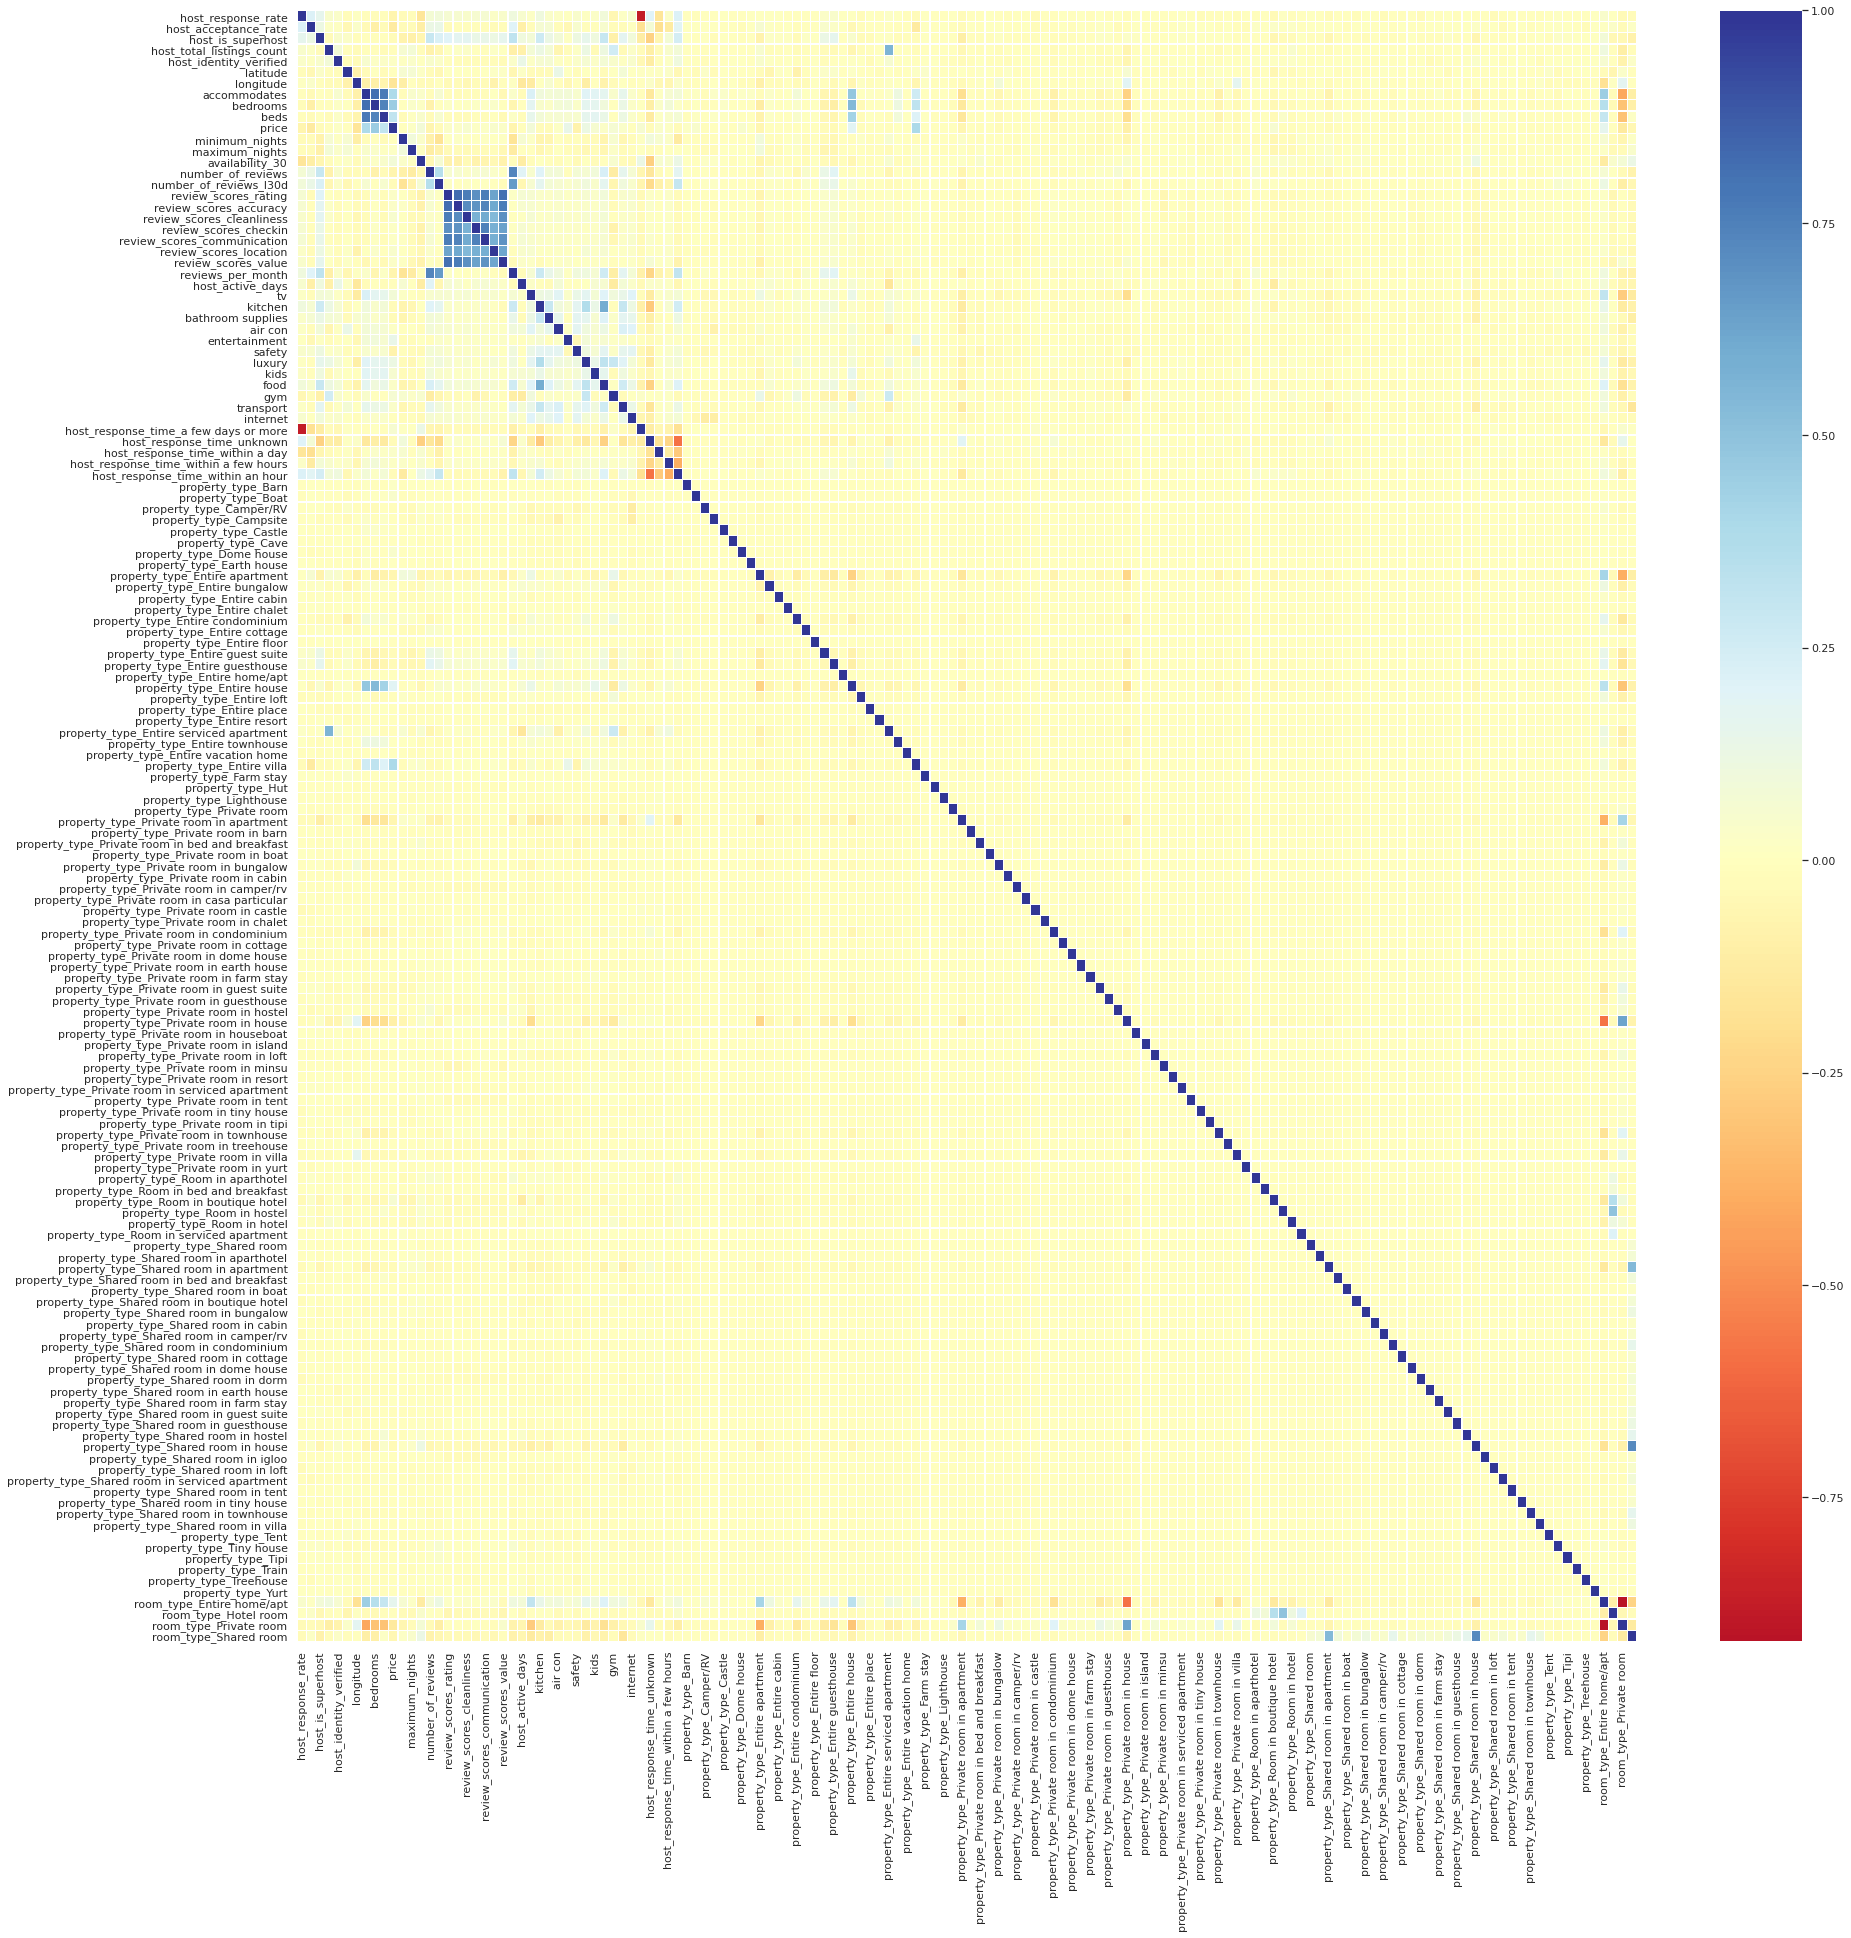

In [144]:
import seaborn as sns
corr_martix = transformed_df.corr()

column_key_list = list(transformed_df.keys())

plt.figure(figsize=(30,30))
sns.set(style='white')
ax = sns.heatmap(corr_martix, linewidth=0.1,cmap="RdYlBu",center=0)
plt.show()

In [145]:
transformed_df.describe()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,host_active_days,tv,kitchen,bathroom supplies,air con,entertainment,safety,luxury,kids,food,gym,transport,internet,...,property_type_Room in serviced apartment,property_type_Shared room,property_type_Shared room in aparthotel,property_type_Shared room in apartment,property_type_Shared room in bed and breakfast,property_type_Shared room in boat,property_type_Shared room in boutique hotel,property_type_Shared room in bungalow,property_type_Shared room in cabin,property_type_Shared room in camper/rv,property_type_Shared room in condominium,property_type_Shared room in cottage,property_type_Shared room in dome house,property_type_Shared room in dorm,property_type_Shared room in earth house,property_type_Shared room in farm stay,property_type_Shared room in guest suite,property_type_Shared room in guesthouse,property_type_Shared room in hostel,property_type_Shared room in house,property_type_Shared room in igloo,property_type_Shared room in loft,property_type_Shared room in serviced apartment,property_type_Shared room in tent,property_type_Shared room in tiny house,property_type_Shared room in townhouse,property_type_Shared room in villa,property_type_Tent,property_type_Tiny house,property_type_Tipi,property_type_Train,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
count,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,...,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000,30533.000000
mean,0.940076,0.867578,0.319097,29.284872,0.799332,34.045726,-118.316447,3.519143,1.541185,1.910883,218.908765,18.394458,669.162316,11.886811,35.220679,0.550421,95.117578,9.711460,9.567812,9.820391,9.797924,9.780631,9.568336,1.147737,1711.478368,0.825992,0.601939,0.769823,0.931025,0.009465,0.932336,0.495660,0.070645,0.577605,0.138604,0.852094,0.974781,...,0.000229,0.000131,0.000197,0.009793,0.000262,0.000033,0.000197,0.000426,0.000033,0.000066,0.000753,0.000066,0.000066,0.000197,0.000098,0.000066,0.000262,0.000459,0.000852,0.016900,0.000033,0.000066,0.000229,0.000033,0.000066,0.000852,0.000393,0.000098,0.002358,0.000066,0.000033,0.000229,0.000098,0.643075,0.005076,0.319327,0.032522
std,0.179567,0.224874,0.466134,159.149195,0.400507,0.132796,0.168119,2.495299,1.003163,1.560502,588.990986,31.499893,514.881882,12.422748,66.003147,1.428244,8.155833,0.827559,0.926007,0.690160,0.745289,0.671778,0.890042,1.621779,898.974674,0.379123,0.489506,0.420953,0.253415,0.096829,0.251173,0.499989,0.256235,0.493949,0.345539,0.355012,0.156791,...,0.015140,0.011445,0.014017,0.098474,0.016185,0.005723,0.014017,0.020630,0.005723,0.008093,0.027436,0.008093,0.008093,0.014017,0.009912,0.008093,0.016185,0.021409,0.029169,0.128898,0.005723

###Log number 

In [146]:
#these number have a great gap between max and min
number_log_list = ['host_total_listings_count','minimum_nights','maximum_nights','number_of_reviews','host_active_days']


for key in number_log_list:
    transformed_df[key] = transformed_df[key].replace(0.0, 0.01) # Replacing 0s with 0.01
    transformed_df[key] = np.log(transformed_df[key])

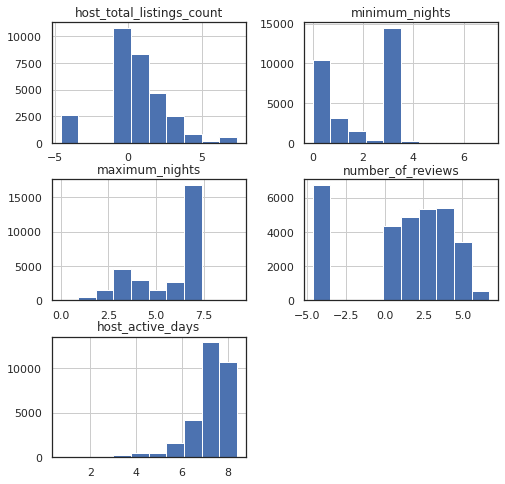

In [147]:
transformed_df[number_log_list].hist(figsize=(8,8));

### location minus center place

In [148]:
location_list = ['latitude','longitude']
for key in location_list:
  max = transformed_df[key].max()
  min = transformed_df[key].min()
  center=(max-min)/2+min
  print(key,max,min,center)
  transformed_df[key] = transformed_df[key].sub(center)

del max,min,center

latitude 34.81119 33.338770000000004 34.074980000000004
longitude -117.65418000000001 -118.93422 -118.2942


In [149]:
transformed_df.head(4)

,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,host_active_days,tv,kitchen,bathroom supplies,air con,entertainment,safety,luxury,kids,food,gym,transport,internet,...,property_type_Room in serviced apartment,property_type_Shared room,property_type_Shared room in aparthotel,property_type_Shared room in apartment,property_type_Shared room in bed and breakfast,property_type_Shared room in boat,property_type_Shared room in boutique hotel,property_type_Shared room in bungalow,property_type_Shared room in cabin,property_type_Shared room in camper/rv,property_type_Shared room in condominium,property_type_Shared room in cottage,property_type_Shared room in dome house,property_type_Shared room in dorm,property_type_Shared room in earth house,property_type_Shared room in farm stay,property_type_Shared room in guest suite,property_type_Shared room in guesthouse,property_type_Shared room in hostel,property_type_Shared room in house,property_type_Shared room in igloo,property_type_Shared room in loft,property_type_Shared room in serviced apartment,property_type_Shared room in tent,property_type_Shared room in tiny house,property_type_Shared room in townhouse,property_type_Shared room in villa,property_type_Tent,property_type_Tiny house,property_type_Tipi,property_type_Train,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,1.00,0.00,0,0.000000,1,-0.09289,-0.09074,6,2.0,3.0,115.0,3.401197,6.593045,0,0.693147,0,80.0,10.0,10.0,6.0,8.0,10.0,8.0,0.02,8.408940,1,0,1,1,0,1.0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1.00,1.00,1,0.693147,1,0.02270,-0.05182,1,1.0,1.0,75.0,3.401197,5.902633,0,3.295837,1,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0.35,8.390723,0,1,1,1,0,1.0,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0.92,0.50,0,0.693147,1,-0.07023,-0.18707,1,1.0,1.0,155.0,0.000000,5.192957,30,3.044522,0,94.0,9.0,9.0,9.0,9.0,10.0,9.0,0.18,8.390496,0,1,1,1,0,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1.00,0.96,0,0.000000,1,-0.19879,0.18023,2,1.0,1.0,50.0,3.401197,6.593045,0,-4.605170,0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0.00,8.388678,1,1,0,1,0,1.0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


###Separate feature and answer

In [150]:
transformed_df.isnull().values.any()

True

In [151]:
df_na = transformed_df[transformed_df.isna().any(axis=1)]

In [152]:
df_na

,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,host_active_days,tv,kitchen,bathroom supplies,air con,entertainment,safety,luxury,kids,food,gym,transport,internet,...,property_type_Room in serviced apartment,property_type_Shared room,property_type_Shared room in aparthotel,property_type_Shared room in apartment,property_type_Shared room in bed and breakfast,property_type_Shared room in boat,property_type_Shared room in boutique hotel,property_type_Shared room in bungalow,property_type_Shared room in cabin,property_type_Shared room in camper/rv,property_type_Shared room in condominium,property_type_Shared room in cottage,property_type_Shared room in dome house,property_type_Shared room in dorm,property_type_Shared room in earth house,property_type_Shared room in farm stay,property_type_Shared room in guest suite,property_type_Shared room in guesthouse,property_type_Shared room in hostel,property_type_Shared room in house,property_type_Shared room in igloo,property_type_Shared room in loft,property_type_Shared room in serviced apartment,property_type_Shared room in tent,property_type_Shared room in tiny house,property_type_Shared room in townhouse,property_type_Shared room in villa,property_type_Tent,property_type_Tiny house,property_type_Tipi,property_type_Train,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
28010,1.0,0.96,0,2.484907,1,-0.09774,0.42609,7,3.0,4.0,200.0,0.0,5.899897,30,2.079442,3,90.0,9.0,10.0,10.0,9.0,10.0,10.0,4.07,NaN,1,1,1,1,0,1.0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
28267,1.0,0.96,0,2.484907,1,-0.09819,0.42626,2,1.0,1.0,75.0,0.0,5.899897,30,1.386294,0,80.0,10.0,10.0,10.0,10.0,10.0,10.0,1.64,NaN,1,0,1,1,0,1.0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
28275,1.0,0.96,0,2.484907,1,-0.09210,0.40405,2,1.0,1.0,66.0,0.0,7.025538,26,0.000000,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0.45,NaN,1,1,1,1,0,1.0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
28411,1.0,0.96,0,2.484907,1,-0.09246,0.40630,4,1.0,2.0,76.0,0.0,5.899897,26,1.098612,1,100.0,9.0,9.0,10.0,10.0,10.0,10.0,2.57,NaN,1,0,1,1,0,1.0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [153]:
transformed_df = transformed_df.dropna()

In [154]:
from sklearn.preprocessing import StandardScaler

# Separate X(feature) and y(answer)
X = transformed_df.drop('price', axis=1)
Y = transformed_df.price

# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

###Traing and testing data generate

In [155]:
from sklearn.model_selection import train_test_split

traing_data = {'x':[],'y':[]}
testing_data = {'x':[],'y':[]}

for index in range(10):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=index)
  traing_data['x'].append(X_train)
  traing_data['y'].append(Y_train)
  testing_data['x'].append(X_test)
  testing_data['y'].append(Y_test)

del X_train,X_test,Y_train,Y_test

##Modeling

###public function

In [156]:
def Ave(lst): 
  return sum(lst) / len(lst) 

Total_result = {}

### Model 1: Linear Regression 

In [157]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


algorithm = 'Linear Regression'
print(algorithm)
model = LinearRegression()
result = {'training':{'score':[],'MSE':[],'r2':[],'time':[]},'testing':{'score':[],'MSE':[],'r2':[],'time':[]}}
for index in range(10):
  #training
  start = time.time()
  x = traing_data['x'][index]
  y = traing_data['y'][index]
  model.fit(x, y)
  training_pred = model.predict(x)
  result['training']['score'].append(model.score(x, y))
  result['training']['MSE'].append(round(mean_squared_error(y, training_pred),4))
  result['training']['r2'].append(round(r2_score(y, training_pred),4))
  result['training']['time'].append(round((time.time() - start)/60,1))
  
  #testing  
  start = time.time()
  x = testing_data['x'][index]
  y = testing_data['y'][index]
  testing_pred = model.predict(x)
  result['testing']['score'].append(model.score(x, y))
  result['testing']['MSE'].append(round(mean_squared_error(y, testing_pred),4))
  result['testing']['r2'].append(round(r2_score(y, testing_pred),4))
  result['testing']['time'].append(round((time.time() - start),1))

  '''
  for data in result:
    print(index,data)
    for measure in result[data]:
      print(measure,result[data][measure][index])
  '''

Total_result.update({algorithm:{}})
for data in result:
  Total_result[algorithm].update({data:{}})
  print(data,":")
  for measure in result[data]:
    avg = Ave(result[data][measure])
    Total_result[algorithm][data].update({measure:avg})
    print(measure,avg)


Linear Regression
training :
score 0.33870978876503965
MSE 228964.86244
r2 0.33871999999999997
time 0.0
testing :
score -1.313645039400256e+24
MSE 4.1253939558063426e+29
r2 -1.313645039400256e+24
time 0.0


###Model 2: Ridge Regression

In [158]:
from sklearn import linear_model


algorithm = 'Ridge Regression'
print(algorithm)
alpha = 100
model = linear_model.Ridge(alpha=alpha)
result = {'training':{'score':[],'MSE':[],'r2':[],'time':[]},'testing':{'score':[],'MSE':[],'r2':[],'time':[]}}
for index in range(10):
  #training
  start = time.time()
  x = traing_data['x'][index]
  y = traing_data['y'][index]
  model.fit(x, y)
  training_pred = model.predict(x)
  result['training']['score'].append(model.score(x, y))
  result['training']['MSE'].append(round(mean_squared_error(y, training_pred),4))
  result['training']['r2'].append(round(r2_score(y, training_pred),4))
  result['training']['time'].append(round((time.time() - start)/60,1))
  
  #testing  
  start = time.time()
  x = testing_data['x'][index]
  y = testing_data['y'][index]
  testing_pred = model.predict(x)
  result['testing']['score'].append(model.score(x, y))
  result['testing']['MSE'].append(round(mean_squared_error(y, testing_pred),4))
  result['testing']['r2'].append(round(r2_score(y, testing_pred),4))
  result['testing']['time'].append(round((time.time() - start),1))

  '''
  for data in result:
    print(index,data)
    for measure in result[data]:
      print(measure,result[data][measure][index])
  '''

Total_result.update({algorithm:{}})
for data in result:
  Total_result[algorithm].update({data:{}})
  print(data,":")
  for measure in result[data]:
    avg = Ave(result[data][measure])
    Total_result[algorithm][data].update({measure:avg})
    print(measure,avg)



Ridge Regression
training :
score 0.3387495026161379
MSE 228949.72806000002
r2 0.33876000000000006
time 0.0
testing :
score 0.31278967695352394
MSE 241716.67579
r2 0.31277999999999995
time 0.0


###Model 3: Random foreset Regression

In [159]:
from sklearn.ensemble import RandomForestRegressor


algorithm = 'Random foreset Regression'
print(algorithm)
model = RandomForestRegressor(max_depth=2, random_state=0)
result = {'training':{'score':[],'MSE':[],'r2':[],'time':[]},'testing':{'score':[],'MSE':[],'r2':[],'time':[]}}
for index in range(10):
  #training
  start = time.time()
  x = traing_data['x'][index]
  y = traing_data['y'][index]
  model.fit(x, y)
  training_pred = model.predict(x)
  result['training']['score'].append(model.score(x, y))
  result['training']['MSE'].append(round(mean_squared_error(y, training_pred),4))
  result['training']['r2'].append(round(r2_score(y, training_pred),4))
  result['training']['time'].append(round((time.time() - start)/60,1))
  
  #testing  
  start = time.time()
  x = testing_data['x'][index]
  y = testing_data['y'][index]
  testing_pred = model.predict(x)
  result['testing']['score'].append(model.score(x, y))
  result['testing']['MSE'].append(round(mean_squared_error(y, testing_pred),4))
  result['testing']['r2'].append(round(r2_score(y, testing_pred),4))
  result['testing']['time'].append(round((time.time() - start),1))

  '''
  for data in result:
    print(index,data)
    for measure in result[data]:
      print(measure,result[data][measure][index])
  '''


Total_result.update({algorithm:{}})
for data in result:
  Total_result[algorithm].update({data:{}})
  print(data,":")
  for measure in result[data]:
    avg = Ave(result[data][measure])
    Total_result[algorithm][data].update({measure:avg})
    print(measure,avg)



Random foreset Regression
training :
score 0.35094058392929445
MSE 224607.00990000003
r2 0.35093
time 0.09999999999999999
testing :
score 0.28516392290844494
MSE 250208.11277
r2 0.28515999999999997
time 0.0


###Model 4: XGBoost Regression

In [160]:
import xgboost as xgb


algorithm = 'XGBoost Regression'
print(algorithm)
model = xgb.XGBRegressor()
result = {'training':{'score':[],'MSE':[],'r2':[],'time':[]},'testing':{'score':[],'MSE':[],'r2':[],'time':[]}}
for index in range(10):
  #training
  start = time.time()
  x = traing_data['x'][index]
  y = traing_data['y'][index]
  model.fit(x, y)
  training_pred = model.predict(x)
  result['training']['score'].append(model.score(x, y))
  result['training']['MSE'].append(round(mean_squared_error(y, training_pred),4))
  result['training']['r2'].append(round(r2_score(y, training_pred),4))
  result['training']['time'].append(round((time.time() - start)/60,1))
  
  #testing  
  start = time.time()
  x = testing_data['x'][index]
  y = testing_data['y'][index]
  testing_pred = model.predict(x)
  result['testing']['score'].append(model.score(x, y))
  result['testing']['MSE'].append(round(mean_squared_error(y, testing_pred),4))
  result['testing']['r2'].append(round(r2_score(y, testing_pred),4))
  result['testing']['time'].append(round((time.time() - start),1))

  '''
  for data in result:
    print(index,data)
    for measure in result[data]:
      print(measure,result[data][measure][index])
  '''

Total_result.update({algorithm:{}})
for data in result:
  Total_result[algorithm].update({data:{}})
  print(data,":")
  for measure in result[data]:
    avg = Ave(result[data][measure])
    Total_result[algorithm][data].update({measure:avg})
    print(measure,avg)


XGBoost Regression
[12:36:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:36:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:36:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:36:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:36:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:37:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:37:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:37:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprec

In [161]:
ft_weights_xgb_reg = pd.DataFrame(model.feature_importances_, columns=['weight'], index=x.columns)
ft_weights_xgb_reg.sort_values('weight', ascending=False, inplace=True)
ft_weights_xgb_reg

,weight
property_type_Entire villa,0.162126
safety,0.153616
bedrooms,0.106452
reviews_per_month,0.047353
host_total_listings_count,0.046156
...,...
property_type_Entire serviced apartment,0.000000
property_type_Entire resort,0.000000
property_type_Entire place,0.000000
property_type_Entire loft,0.000000


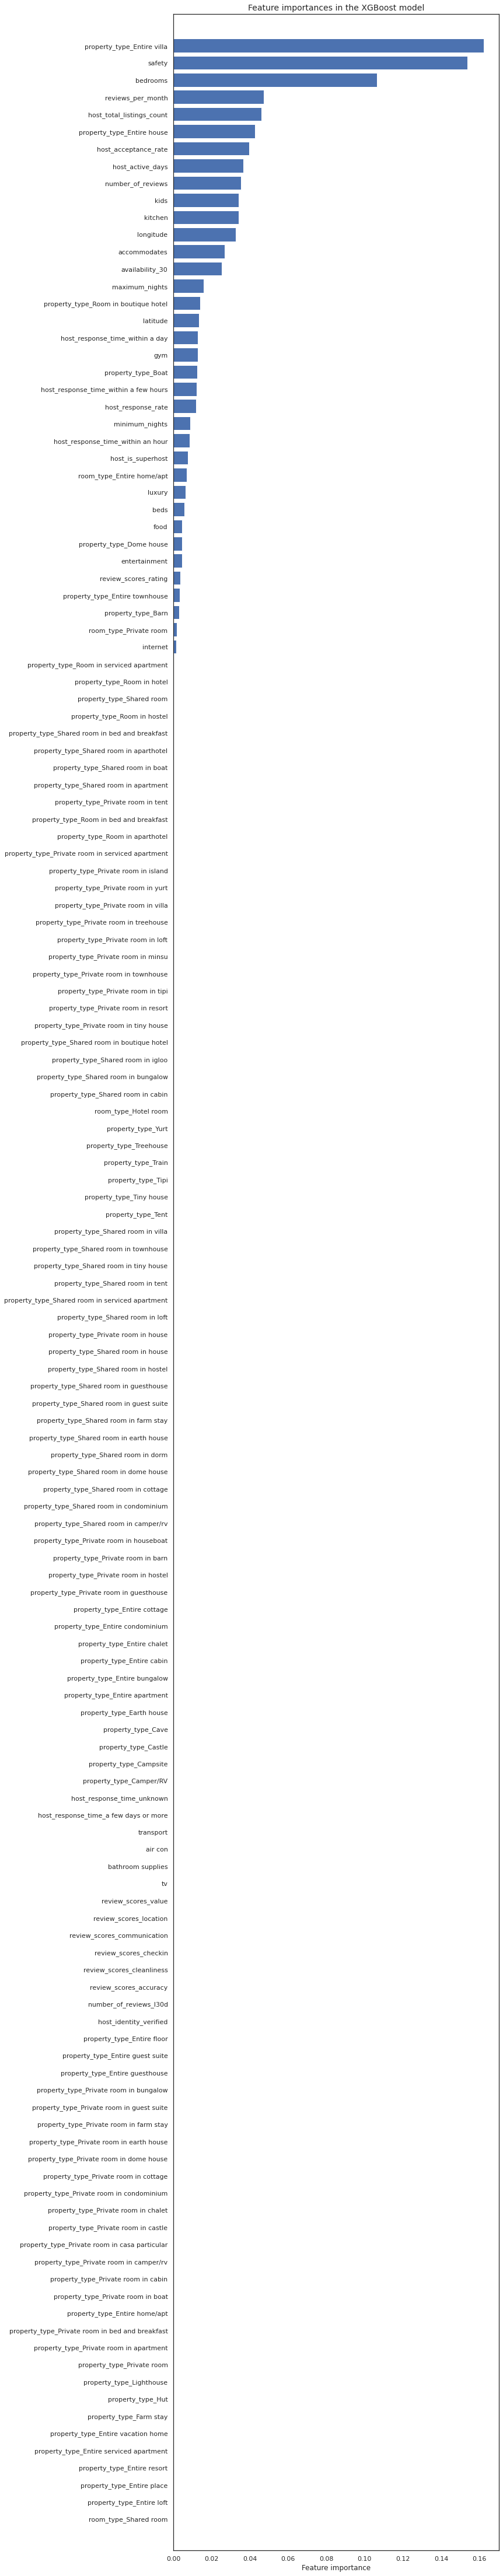

In [162]:
# Plotting feature importances
plt.figure(figsize=(10,80))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.gca().invert_yaxis()
plt.show()

###Model 5: Neural Network with L1 Regularizers

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 128)               18688     
_________________________________________________________________
dense_61 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_62 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_63 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_64 (Dense)             (None, 1)                 513       
Total params: 249,601
Trainable params: 249,601
Non-trainable params: 0
_________________________________________________________________
None


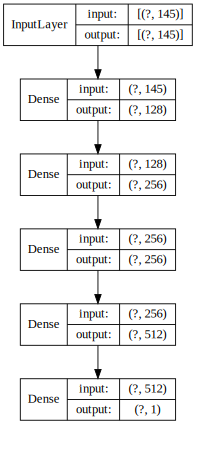

In [163]:
from keras.models import Sequential
from keras import layers, optimizers, regularizers
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

#network setting
models = Sequential()
models.add(layers.Dense(128, input_shape=(x.shape[1],), kernel_regularizer=regularizers.l1(0.005), activation='relu'))
models.add(layers.Dense(256, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
models.add(layers.Dense(256, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
models.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
models.add(layers.Dense(1, activation='linear'))

models.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_squared_error'])

print(models.summary())

SVG(model_to_dot(models, show_layer_names=False, show_shapes=True, dpi=65).create(prog='dot', format='svg'))

In [164]:
import tensorflow as tf

my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=3, monitor = 'val_loss'),]


algorithm = 'Neural Network with L1 Regularizers'
print(algorithm)
result = {'training':{'score':[],'MSE':[],'r2':[],'time':[]},'testing':{'score':[],'MSE':[],'r2':[],'time':[]}}
for index in range(10):
  #training
  start = time.time()
  x = traing_data['x'][index]
  y = traing_data['y'][index]
  models.fit(x,y,epochs=100,batch_size=128,
              validation_split = 0.1,callbacks=my_callbacks)
  training_pred = model.predict(x)
  result['training']['score'].append(model.score(x, y))
  result['training']['MSE'].append(round(mean_squared_error(y, training_pred),4))
  result['training']['r2'].append(round(r2_score(y, training_pred),4))
  result['training']['time'].append(round((time.time() - start),1))
  
  #testing  
  start = time.time()
  x = testing_data['x'][index]
  y = testing_data['y'][index]
  testing_pred = model.predict(x)
  result['testing']['score'].append(model.score(x, y))
  result['testing']['MSE'].append(round(mean_squared_error(y, testing_pred),4))
  result['testing']['r2'].append(round(r2_score(y, testing_pred),4))
  result['testing']['time'].append(round((time.time() - start),1))

  '''
  for data in result:
    print(index,data)
    for measure in result[data]:
      print(measure,result[data][measure][index])
  '''

Total_result.update({algorithm:{}})
for data in result:
  Total_result[algorithm].update({data:{}})
  print(data,":")
  for measure in result[data]:
    avg = Ave(result[data][measure])
    Total_result[algorithm][data].update({measure:avg})
    print(measure,avg)


Neural Network with L1 Regularizers
Epoch 1/100
172/172 [==============================] - 2s 10ms/step - loss: 276512.1562 - mean_squared_error: 276450.2500 - val_loss: 189432.2969 - val_mean_squared_error: 189370.8438
Epoch 2/100
172/172 [==============================] - 2s 9ms/step - loss: 200860.2812 - mean_squared_error: 200797.9375 - val_loss: 187833.5156 - val_mean_squared_error: 187770.6250
Epoch 3/100
172/172 [==============================] - 2s 9ms/step - loss: 179460.1094 - mean_squared_error: 179396.4688 - val_loss: 190652.2969 - val_mean_squared_error: 190588.3281
Epoch 4/100
172/172 [==============================] - 2s 9ms/step - loss: 168040.0781 - mean_squared_error: 167975.6875 - val_loss: 183324.4844 - val_mean_squared_error: 183259.7656
Epoch 5/100
172/172 [==============================] - 2s 9ms/step - loss: 154732.7656 - mean_squared_error: 154667.2031 - val_loss: 187706.9688 - val_mean_squared_error: 187641.2344
Epoch 6/100
172/172 [===========================

###Moedl 6: Neural Network with L2 Regularizers

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 128)               18688     
_________________________________________________________________
dense_66 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_67 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_68 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_69 (Dense)             (None, 1)                 513       
Total params: 249,601
Trainable params: 249,601
Non-trainable params: 0
_________________________________________________________________
None


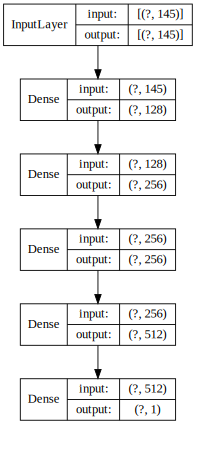

In [165]:
#network setting
models = Sequential()
models.add(layers.Dense(128, input_shape=(x.shape[1],), kernel_regularizer=regularizers.l2(0.005), activation='relu'))
models.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.005), activation='relu'))
models.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.005), activation='relu'))
models.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.005), activation='relu'))
models.add(layers.Dense(1, activation='linear'))

models.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_squared_error'])

print(models.summary())

SVG(model_to_dot(models, show_layer_names=False, show_shapes=True, dpi=65).create(prog='dot', format='svg'))

In [166]:
my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=3, monitor = 'val_loss'),]

algorithm = 'Neural Network with L2 Regularizers'
print(algorithm)
result = {'training':{'score':[],'MSE':[],'r2':[],'time':[]},'testing':{'score':[],'MSE':[],'r2':[],'time':[]}}
for index in range(10):
  #training
  start = time.time()
  x = traing_data['x'][index]
  y = traing_data['y'][index]
  models.fit(x,y,epochs=100,batch_size=128,
              validation_split = 0.1,callbacks=my_callbacks)
  training_pred = model.predict(x)
  result['training']['score'].append(model.score(x, y))
  result['training']['MSE'].append(round(mean_squared_error(y, training_pred),4))
  result['training']['r2'].append(round(r2_score(y, training_pred),4))
  result['training']['time'].append(round((time.time() - start),1))
  
  #testing  
  start = time.time()
  x = testing_data['x'][index]
  y = testing_data['y'][index]
  testing_pred = model.predict(x)
  result['testing']['score'].append(model.score(x, y))
  result['testing']['MSE'].append(round(mean_squared_error(y, testing_pred),4))
  result['testing']['r2'].append(round(r2_score(y, testing_pred),4))
  result['testing']['time'].append(round((time.time() - start),1))

  '''
  for data in result:
    print(index,data)
    for measure in result[data]:
      print(measure,result[data][measure][index])
  '''

Total_result.update({algorithm:{}})
for data in result:
  Total_result[algorithm].update({data:{}})
  print(data,":")
  for measure in result[data]:
    avg = Ave(result[data][measure])
    Total_result[algorithm][data].update({measure:avg})
    print(measure,avg)

Neural Network with L2 Regularizers
Epoch 1/100
172/172 [==============================] - 2s 10ms/step - loss: 282007.4688 - mean_squared_error: 282002.5000 - val_loss: 197628.6875 - val_mean_squared_error: 197623.5938
Epoch 2/100
172/172 [==============================] - 1s 9ms/step - loss: 208448.5938 - mean_squared_error: 208443.2812 - val_loss: 188859.1406 - val_mean_squared_error: 188853.6250
Epoch 3/100
172/172 [==============================] - 1s 9ms/step - loss: 183261.0938 - mean_squared_error: 183255.4844 - val_loss: 206048.2812 - val_mean_squared_error: 206042.3594
Epoch 4/100
172/172 [==============================] - 1s 9ms/step - loss: 170790.7188 - mean_squared_error: 170784.6875 - val_loss: 216897.2656 - val_mean_squared_error: 216891.1094
Epoch 5/100
172/172 [==============================] - 1s 9ms/step - loss: 166257.8125 - mean_squared_error: 166251.4844 - val_loss: 241797.5469 - val_mean_squared_error: 241791.1406
Epoch 1/100
172/172 [===========================

##Result

In [167]:
rows_list = []
for algorithm in Total_result:
  for state in Total_result[algorithm]:
    rows_list.append([algorithm,state,Total_result[algorithm][state]['MSE'],Total_result[algorithm][state]['r2'],Total_result[algorithm][state]['score'],Total_result[algorithm][state]['time']]) 
result_df = pd.DataFrame(rows_list,columns =['algorithm', 'state','MSE','r2','score','time']) 
result_df

,algorithm,state,MSE,r2,score,time
0,Linear Regression,training,2.289649e+05,3.387200e-01,3.387098e-01,0.00
1,Linear Regression,testing,4.125394e+29,-1.313645e+24,-1.313645e+24,0.00
2,Ridge Regression,training,2.289497e+05,3.387600e-01,3.387495e-01,0.00
3,Ridge Regression,testing,2.417167e+05,3.127800e-01,3.127897e-01,0.00
4,Random foreset Regression,training,2.246070e+05,3.509300e-01,3.509406e-01,0.10
5,Random foreset Regression,testing,2.502081e+05,2.851600e-01,2.851639e-01,0.00
6,XGBoost Regression,training,1.177552e+05,6.592000e-01,6.591987e-01,0.10
7,XGBoost Regression,testing,1.905100e+05,4.532400e-01,4.532447e-01,0.10
8,Neural Network with L1 Regularizers,training,1.254963e+05,6.365800e-01,6.365856e-01,9.33
9,Neural Network with L1 Regularizers,testing,1.342830e+05,6.034000e-01,6.033945e-01,0.10


(0.33871999999999997, 0.33876000000000006, 0.35093, 0.6592, 0.6365800000000001, 0.6365800000000001)
(-1.313645039400256e+24, 0.31277999999999995, 0.28515999999999997, 0.45324, 0.6034, 0.6034)


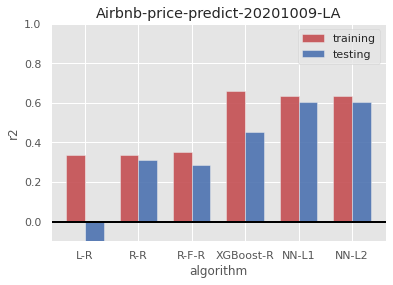

In [168]:
plt.style.use('ggplot')
n = 6

measure = 'r2'
train_result= tuple(result_df[result_df['state']=='training'][measure])
test_result = tuple(result_df[result_df['state']=='testing'][measure])
print(train_result)
print(test_result)

#train_result= (73, 43, 44, 70, 61, 61)
#test_result = (54, 59, 69, 46, 58, 58)

fig, ax = plt.subplots()
index = np.arange(n)
bar_width = 0.35
opacity = 0.9
ax.bar(index, train_result, bar_width, alpha=opacity, color='r',
                label='training')

ax.bar(index+bar_width, test_result, bar_width, alpha=opacity, color='b',
                label='testing')
ax.set_ylim([-0.1,1])
ax.set_xlabel('algorithm')
ax.set_ylabel(measure)
ax.set_title('Airbnb-price-predict-20201009-LA')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('L-R','R-R','R-F-R','XGBoost-R','NN-L1','NN-L2'
    ))
ax.axhline(y=0.0, color='black', linestyle='-', linewidth=2)
ax.legend()
plt.show()

##Reference

1.<a href='http://insideairbnb.com/'>insideairbnb</a>

2.<a href='https://towardsdatascience.com/predicting-airbnb-prices-with-machine-learning-and-location-data-5c1e033d0a5a#c97f'>Predicting Airbnb prices with machine learning and location data</a>

3.<a href='https://towardsdatascience.com/predicting-airbnb-prices-with-machine-learning-and-deep-learning-f46d44afb8a6'>Predicting Airbnb prices with machine learning and deep learning</a>

